In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Achaios'
raceDate = '24/9/2023'
surface = 'Tarmac'
competition = 'Cup'

link = 'https://www.ewrc-results.com/results/85380-rally-sprint-achaios-2023/?s='
startat, no_ss=438732, int(3)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#2,Peroulakis Geo,C2,6:32.82,-,104.2,1,Achaios,24/9/2023,Tarmac,Cup,1
1,2,#1,Koukeas Efstat,C1,6:34.87,+2.05 + 2.05,103.7 0.18,1,Achaios,24/9/2023,Tarmac,Cup,2
2,3,#29,Stafilopatis M,4 2000+,6:39.10,+6.28 + 4.23,102.6 0.55,1,Achaios,24/9/2023,Tarmac,Cup,3
3,4,#7,Karathanassis,C5 F2,6:48.80,+15.98 + 9.70,100.1 1.41,1,Achaios,24/9/2023,Tarmac,Cup,4
4,5,#5,Daskalopoulos,C2,6:49.94,+17.12 + 1.14,99.8 1.51,1,Achaios,24/9/2023,Tarmac,Cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,24,#32,Amaxopoulos D.,2 -1600,8:01.82,+1:42.72 + 3.75,85.0 9.03,3,Achaios,24/9/2023,Tarmac,Cup,24
24,25,#35,Mitropoulos Ko,2 2000,8:04.98,+1:45.88 + 3.16,84.4 9.31,3,Achaios,24/9/2023,Tarmac,Cup,25
25,26,#27,Diamantis D.,C4 F2,8:05.13,+1:46.03 + 0.15,84.4 9.33,3,Achaios,24/9/2023,Tarmac,Cup,26
26,27,#9,Kapralos D. -,C3 F2,8:07.71,+1:48.61 + 2.58,83.9 9.55,3,Achaios,24/9/2023,Tarmac,Cup,27


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Peroulakis Geo,C2,1,Achaios,24/9/2023,Tarmac,Cup,1,392.82
1,Koukeas Efstat,C1,1,Achaios,24/9/2023,Tarmac,Cup,2,394.87
2,Stafilopatis M,4 2000+,1,Achaios,24/9/2023,Tarmac,Cup,3,399.10
3,Karathanassis,C5 F2,1,Achaios,24/9/2023,Tarmac,Cup,4,408.80
4,Daskalopoulos,C2,1,Achaios,24/9/2023,Tarmac,Cup,5,409.94
...,...,...,...,...,...,...,...,...,...
23,Amaxopoulos D.,2 -1600,3,Achaios,24/9/2023,Tarmac,Cup,24,481.82
24,Mitropoulos Ko,2 2000,3,Achaios,24/9/2023,Tarmac,Cup,25,484.98
25,Diamantis D.,C4 F2,3,Achaios,24/9/2023,Tarmac,Cup,26,485.13
26,Kapralos D. -,C3 F2,3,Achaios,24/9/2023,Tarmac,Cup,27,487.71


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Achaios 1     392.82
        2     384.84
        3     379.10

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Peroulakis Geo,C2,1,Achaios,24/9/2023,Tarmac,Cup,1,392.82,392.82,0.00,0.000000,01
1,Koukeas Efstat,C1,1,Achaios,24/9/2023,Tarmac,Cup,2,394.87,392.82,2.05,0.521868,01
2,Stafilopatis M,4 2000+,1,Achaios,24/9/2023,Tarmac,Cup,3,399.10,392.82,6.28,1.598697,01
3,Karathanassis,C5 F2,1,Achaios,24/9/2023,Tarmac,Cup,4,408.80,392.82,15.98,4.068021,01
4,Daskalopoulos,C2,1,Achaios,24/9/2023,Tarmac,Cup,5,409.94,392.82,17.12,4.358230,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Amaxopoulos D.,2 -1600,3,Achaios,24/9/2023,Tarmac,Cup,24,481.82,379.10,102.72,27.095753,03
87,Mitropoulos Ko,2 2000,3,Achaios,24/9/2023,Tarmac,Cup,25,484.98,379.10,105.88,27.929306,03
88,Diamantis D.,C4 F2,3,Achaios,24/9/2023,Tarmac,Cup,26,485.13,379.10,106.03,27.968874,03
89,Kapralos D. -,C3 F2,3,Achaios,24/9/2023,Tarmac,Cup,27,487.71,379.10,108.61,28.649433,03


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Peroulakis Geo,C2,1,Achaios,24/9/2023,Tarmac,Cup,1,392.82,392.82,0.00,0.000000,01
1,Koukeas Efstat,C1,1,Achaios,24/9/2023,Tarmac,Cup,2,394.87,392.82,2.05,0.521868,01
4,Daskalopoulos,C2,1,Achaios,24/9/2023,Tarmac,Cup,5,409.94,392.82,17.12,4.358230,01
9,Papadopoulos N,C2,1,Achaios,24/9/2023,Tarmac,Cup,10,425.84,392.82,33.02,8.405886,01
10,Kandiliotis V.,C2,1,Achaios,24/9/2023,Tarmac,Cup,11,427.63,392.82,34.81,8.861565,01
16,Nomikos Andrea,C1,1,Achaios,24/9/2023,Tarmac,Cup,17,443.87,392.82,51.05,12.995774,01
17,Labropoulos P.,C2,1,Achaios,24/9/2023,Tarmac,Cup,18,444.10,392.82,51.28,13.054325,01
33,Koukeas Efstat,C1,2,Achaios,24/9/2023,Tarmac,Cup,1,384.84,384.84,0.00,0.000000,02
34,Peroulakis Geo,C2,2,Achaios,24/9/2023,Tarmac,Cup,2,385.43,384.84,0.59,0.153310,02
39,Papadopoulos N,C2,2,Achaios,24/9/2023,Tarmac,Cup,7,416.27,384.84,31.43,8.167030,02


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Achaios              
SS.                 01     02     03
Crew                                
Daskalopoulos    17.12  44.18    NaN
Kandiliotis V.   34.81    NaN    NaN
Koukeas Efstat    2.05   0.00   0.00
Labropoulos P.   51.28  45.76  47.86
Nomikos Andrea   51.05  39.23  40.13
Papadopoulos N   33.02  31.43  37.38
Peroulakis Geo    0.00   0.59   1.55

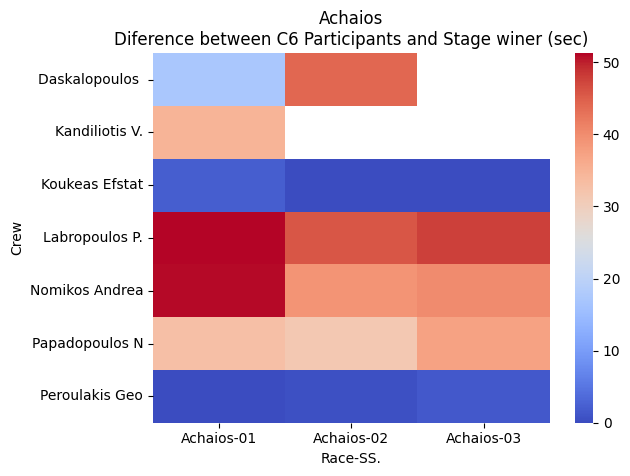

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

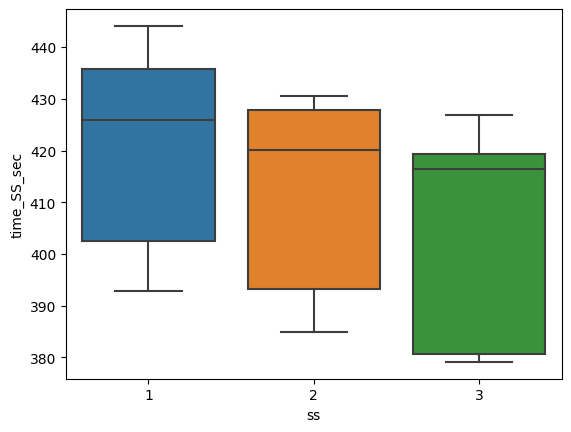

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

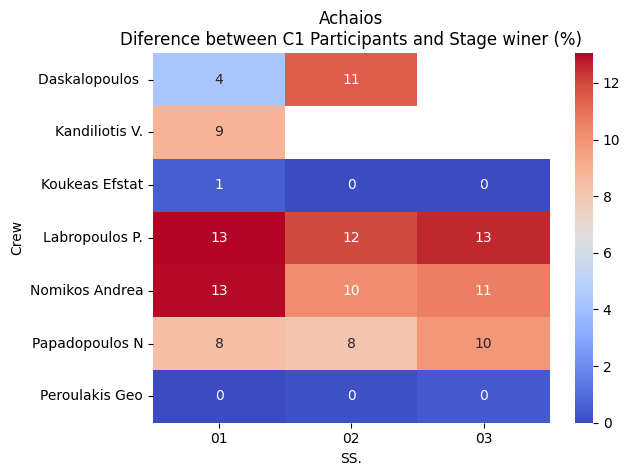

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")